<a href="https://colab.research.google.com/github/melchiadesblanco/CID_UX4DS/blob/main/CASE03_aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
Case 3 - Avaliação Modelo NBO

#### O objetivo deste trabalho é: 

Contar uma história que mostre se a recomendação do carrossel faz ou não sentido com base no histórico de compra do cliente.

A idéia é aplicar princípios de validação da metodologia CRISP.

Se você fosse um coordenador de DS, você deixaria este modelo ser implementado em produção?

NBO -> "Next Best Offer"
No dataset atual, é feito uma sugestão de 5 produtos e também traz o score de cada sugestão que é a probabilidade do consumidor comprar aquele produto.

#### Resumo Aula

- Aula 1: Criação dos grupos e introdução aos temas
- Aula 2: Fazer as análises exploratórias básicas
- Aula 3: EDA - Exploratory Data Analysis - Hipóteses

# Anotações do Professor
- 12M faz sentido olhando para 6M?
- Valores errados? Nulos? Zero?
- Outliers
- Distribuição dos produtos vendidos faz sentido?
- Novos casos de validação (check de sanidade)
- Não esquecer o story telling
- Verificar se os padrões são os mesmos (realizado, recomendado)

# Comentários Melchiades
1. As recomendações do carrosel utilizam um range de sugestões para cada NBO, o que pode tornar alguns NBO mal utilizados.

- NBO 1 -> Produto 1  ao 20
- NBO 2 -> Produto 21 ao 33
- NBO 3 -> Produto 34 ao 50
- NBO 4 -> Produto 51 ao 66
- NBO 5 -> Produto 67 ao 80

2. Foi observado que existe uma grande quantidade de recomendações unicas de NBOs, ou seja, que não são recomendadas para outros consumidores com os mesmos valores de NBO 1-5.
Isto pode significar que o modelo pode estar com overfiting?

#Comentários Homero
1. A distribuição das vendas não é muito desigual, o produto mais vendido não chega a ter o dobro da quantidade do menos vendido, por exemplo, o modelo deve ter usado realmente critérios mais complexos para criar as cestas de recomendações ou é totalmente randômico.
2. O fato de termos recomendações únicas pode ser apenas uma questão de probabilidade, mas provavelmente indica também que o modelo não é um modelo tão simples, não necessariamente com overfitting (minha opinião).
3. Como comentou o Melchiades o carrosel utilizar um range de produtos não parece uma boa ideia, mas provavelmente simplifica o modelo, ou pode ter outro objetivo ainda não encontrado se os produtos estiverem em algum tipo de departamento (para gerar um possível equilibrio talvez?)
4. A distribuição de vendas média parecia perfeitamente normal nos 12 meses e agora nos 6 meses a concentração e desvio padrão são menores e mais baixos, sendo, o que está ocorrendo? As vendas nos 6 meses são menores (são o ínicio ou fim do período?).

# Comentários Fabio
1. Qual o Top 10 + Vendidos vs. Top 10 + Recomendados
2. Qtos Consumidores compraram 6 meses ? Qtos compraram 12? Qto compraram nos dois períodos?
3. Dos clientes que compraram nos dois períodos, quais os itens mais vendidos?




## Limpeza do Dataset

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [ ]:
#Rodar no Jupyter Local
# df_hist = pd.read_csv('./data/CASE_03_Compras_Hist.csv', sep=';')
# df_carrossel = pd.read_csv('./data/CASE_03_NBO_Result.csv', sep=';')

#Rodar no Google Colab
df_hist = pd.read_csv('/content/CASE_03_Compras_Hist.csv', sep=';')
df_carrossel = pd.read_csv('/content/CASE_03_NBO_Result.csv', sep=';')

In [ ]:
df_hist.dtypes

Consumidor            int64
Produto               int64
Quantidade Acc 12M    int64
Quantidade Acc 6M     int64
dtype: object

In [ ]:
df_carrossel['Score NBO 1'] = df_carrossel['Score NBO 1'].str.replace(',', '.').astype(float)
df_carrossel['Score NBO 2'] = df_carrossel['Score NBO 2'].str.replace(',', '.').astype(float)
df_carrossel['Score NBO 3'] = df_carrossel['Score NBO 3'].str.replace(',', '.').astype(float)
df_carrossel['Score NBO 4'] = df_carrossel['Score NBO 4'].str.replace(',', '.').astype(float)
df_carrossel['Score NBO 5'] = df_carrossel['Score NBO 5'].str.replace(',', '.').astype(float)

In [ ]:
df_carrossel.dtypes

Consumidor      int64
NBO 1           int64
NBO 2           int64
NBO 3           int64
NBO 4           int64
NBO 5           int64
Score NBO 1    object
Score NBO 2    object
Score NBO 3    object
Score NBO 4    object
Score NBO 5    object
dtype: object

In [28]:
#TODO: Linhas [Consumidor,Produto] duplicadas?

#Somar ou pegar uma linha???
#==> Como não temos evidencias do que significa cada ocorrencia de duplicação, optamos por somar
# E se somar e 6M for maior que 12M???
# Se não somar, esta impactando no indicador de produtos mais vendidos...
# Se optar por deixar só a primeira ocorrencia?
# Se somar pode impactar no TOP 5 produtos mais vendidos

df_hist[df_hist['Consumidor']==156].sort_values(by=['Produto'])

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
8709,156,2,4,0
8733,156,5,1,0
8703,156,6,5,4
8728,156,7,3,0
8708,156,7,0,0
8700,156,7,4,1
8710,156,16,2,1
8732,156,19,3,2
8729,156,19,1,0
8722,156,19,3,0


In [ ]:
#TODO: 

In [ ]:
#Valores Nulos
df_hist[df_hist.isna().any(axis=1)]

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M


In [ ]:
df_carrossel[df_carrossel.isna().any(axis=1)]

,Consumidor,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5


In [ ]:
#Valores inconsistentes
df_hist[df_hist['Quantidade Acc 12M'] < df_hist['Quantidade Acc 6M']]

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M


## EDA - Análise Exploratória

In [ ]:
#Analise Inicial - Histórico de Compras
df_hist.describe()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
count,1048488.000,1048488.000,1048488.000,1048488.000
mean,9362.000,40.493,2.500,0.625
std,5404.867,23.082,1.708,1.099
min,1.000,1.000,0.000,0.000
25%,4681.000,21.000,1.000,0.000
50%,9362.000,41.000,2.000,0.000
75%,14043.000,60.000,4.000,1.000
max,18723.000,80.000,5.000,5.000


#Distribuição de vendas por consumidor

Aqui já podemos analisar algo diferente que está ocorrendo no comportamento de vendas ou de compras dos consumidores, a distribuição era praticamente perfeitamente normal no período dos últimos 12 meses e agora nos últimos 6 meses as vendas se concentraram muito mais em faixas médias menores, ou seja, os consumidores estão consumindo menos? Isso levando em consideração que o período é menor mas complementar não era de se esperar tal comportamento.



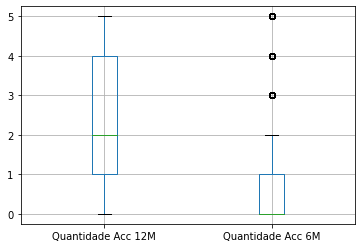

In [ ]:
df_hist.boxplot(column=['Quantidade Acc 12M','Quantidade Acc 6M'])

In [ ]:
df_hist.sample(n=5)

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
460450,8223,56,0,0
447158,7985,80,1,1
700256,12505,6,4,0
761270,13595,23,1,0
806781,14407,61,1,0


In [ ]:
#Analise Inicial - Histórico de Recomendações
df_carrossel.describe()

,Consumidor,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5
count,18723.000,18723.000,18723.000,18723.000,18723.000,18723.000,18723.000,18723.000,18723.000,18723.000,18723.000
mean,9362.000,10.574,27.017,42.057,58.506,73.476,0.744,0.744,0.745,0.746,0.745
std,5405.009,5.778,3.741,4.918,4.625,4.025,0.139,0.139,0.138,0.138,0.139
min,1.000,1.000,21.000,34.000,51.000,67.000,0.510,0.510,0.510,0.510,0.510
25%,4681.500,6.000,24.000,38.000,55.000,70.000,0.620,0.620,0.630,0.630,0.620
50%,9362.000,11.000,27.000,42.000,58.000,73.000,0.740,0.740,0.750,0.750,0.740
75%,14042.500,16.000,30.000,46.000,63.000,77.000,0.870,0.870,0.860,0.870,0.870
max,18723.000,20.000,33.000,50.000,66.000,80.000,0.980,0.980,0.980,0.980,0.980


In [ ]:
df_carrossel.sample(n=5)

,Consumidor,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5
13562,13563,15,32,49,56,69,0.630,0.590,0.940,0.560,0.900
16291,16292,17,28,50,59,73,0.540,0.710,0.760,0.680,0.700
2121,2122,2,27,35,52,76,0.940,0.550,0.660,0.800,0.840
1203,1204,18,31,40,55,79,0.760,0.980,0.900,0.680,0.540
7623,7624,20,31,41,65,78,0.970,0.570,0.670,0.610,0.980


In [ ]:
#TOP 5 Produtos vendidos na base histórica
#df_hist_top5 = df_hist['Produto'].value_counts().sort_values(ascending=False).head(5)
#df_hist_top5

df_hist_sum_prod = df_hist.groupby(['Produto'])['Quantidade Acc 12M'].agg('sum')

df_hist_sum_prod.sort_values(ascending=False).head(5)

Produto
2     33581
22    33473
19    33357
41    33344
62    33333
Name: Quantidade Acc 12M, dtype: int64

In [ ]:
#LOWEST 5 Produtos vendidos na base histórica
df_hist_sum_prod.sort_values(ascending=True).head(5)

Produto
12    32007
30    32031
13    32108
47    32144
26    32206
Name: Quantidade Acc 12M, dtype: int64

In [ ]:
#df_hist_sum_prod.boxplot(column='sum')
# criar um boxplot da distribuição de vendas por produto

In [ ]:
#TOP 5 Produtos Mais Sugeridos no carrossel
a = df_carrossel['NBO 1']
b = df_carrossel['NBO 2']
c = df_carrossel['NBO 3']
d = df_carrossel['NBO 4']
e = df_carrossel['NBO 5']

df_carrossel_top5 = pd.concat([a, b, c, d, e])
df_carrossel_top5 = df_carrossel_top5.value_counts().sort_values(ascending=False).head(5)
df_carrossel_top5

31    1476
27    1471
32    1463
22    1463
24    1460
dtype: int64

In [ ]:
#LOWEST 5 Produtos Menos Sugeridos no carrossel
df_carrossel_lowest5 = pd.concat([a, b, c, d, e])
df_carrossel_lowest5 = df_carrossel_lowest5.value_counts().sort_values(ascending=True).head(5)
df_carrossel_lowest5

14    875
3     891
8     899
7     904
2     907
dtype: int64

In [ ]:
#TOP 5 Consumidores (com base no numero de compras na base histórica) 6M
df_hist_top5con6M = df_hist[df_hist['Quantidade Acc 6M'] > 0]
df_hist_top5con6M = df_hist_top5con6M.groupby(['Consumidor'])['Quantidade Acc 6M'].agg('sum')
df_hist_top5con6M = df_hist_top5con6M.sort_values(ascending=False).head(5)

df_hist_top5con6M

# Quantidade Acc 12M 	Quantidade Acc 6M

Consumidor
11859    76
14244    73
4642     70
3543     68
15962    67
Name: Quantidade Acc 6M, dtype: int64

In [ ]:
#TOP 5 Consumidores (com base no numero de compras na base histórica) 12M
df_hist_top5con12M = df_hist[df_hist['Quantidade Acc 12M'] > 0]
#df_hist_top5con12M = df_hist_top5con12M['Consumidor'].value_counts().sort_values(ascending=False).head(5)
#df_hist_top5con12M

df_hist_top5con12M = df_hist_top5con12M.groupby(['Consumidor'])['Quantidade Acc 12M'].agg('sum')

df_hist_top5con12M = df_hist_top5con12M.sort_values(ascending=False).head(5)

df_hist_top5con12M

Consumidor
17663    187
13105    186
9675     185
9094     183
1784     182
Name: Quantidade Acc 12M, dtype: int64

In [ ]:
#Trazer o NBO do TOP 5 Consumidores 6M
df_hist_top5con6M = pd.merge(df_hist_top5con6M, df_carrossel, how='inner', on=["Consumidor", "Consumidor"])
df_hist_top5con6M

,Consumidor,Quantidade Acc 6M,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5
0,11859,76,12,31,47,63,79,0.620,0.930,0.970,0.590,0.630
1,14244,73,18,22,49,53,79,0.970,0.640,0.760,0.660,0.650
2,4642,70,11,33,50,64,71,0.860,0.900,0.810,0.730,0.630
3,3543,68,16,22,50,63,79,0.860,0.920,0.600,0.870,0.650
4,15962,67,12,33,38,53,69,0.880,0.900,0.650,0.950,0.830


In [ ]:
#Trazer o NBO do TOP 5 Consumidores 12M
df_hist_top5con12M = pd.merge(df_hist_top5con12M, df_carrossel, how='inner', on=["Consumidor", "Consumidor"])
df_hist_top5con12M

,Consumidor,Quantidade Acc 12M,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5
0,17663,187,15,31,46,65,80,0.580,0.890,0.960,0.880,0.580
1,13105,186,16,30,39,53,78,0.770,0.920,0.850,0.530,0.510
2,9675,185,18,28,34,58,73,0.540,0.510,0.600,0.820,0.530
3,9094,183,12,33,50,66,73,0.550,0.610,0.510,0.620,0.550
4,1784,182,18,22,50,65,77,0.660,0.820,0.790,0.820,0.940


# REMARK: Qual a lógica por traz da recomendação dos 5 produtos do carrossel?
Cada NBO [1 ao 5] pode sugerir apenas um range de produtos como é demonstrado a seguir

=> Isto é ruim pois caso o cliente tenha um historico de compras somente para produtos da faixa (67 ao 80), os outros NBOs ficariam mal utilizados

In [ ]:
df_carrossel['NBO 1'].describe()   # Produto 1  ao 20

In [ ]:
df_carrossel['NBO 2'].describe()    # Produto 21 ao 33

In [ ]:
df_carrossel['NBO 3'].describe()    # Produto 34 ao 50

In [ ]:
df_carrossel['NBO 4'].describe()    # Produto 51 ao 66

In [ ]:
df_carrossel['NBO 5'].describe()    # Produto 67 ao 80

# REMARK: Quantas variações de recomendações foram feitas?
==> 18562 variações de um total de 18723 => 99.14 % de recomendações únicas

In [ ]:
df_carrossel['ConjuntoID'] = 99*(100**5) + (df_carrossel['NBO 1']*(100**4)) + (df_carrossel['NBO 2']*(100**3)) + (df_carrossel['NBO 3']*(100**2)) + (df_carrossel['NBO 4']*(100**1)) + (df_carrossel['NBO 5']*(100**0))
df_carrossel['ConjuntoID'].value_counts().sort_values(ascending=False)


#REMARK: Consumidores que nunca compraram?

In [ ]:
df_hist_nonbuyers = df_hist.groupby(['Consumidor'], as_index=False)['Quantidade Acc 12M'].sum()
df_hist_nonbuyers.columns = ['Consumidor', 'Total Acc 12M']
df_hist_nonbuyers[df_hist_nonbuyers['Total Acc 12M']==0 ]

#REMARK: Produtos que nunca foram vendidos?

In [ ]:
df_hist_neversold = df_hist.groupby(['Produto'], as_index=False)['Quantidade Acc 12M'].sum()
df_hist_neversold.columns = ['Produto', 'Total Acc 12M']
df_hist_neversold[df_hist_neversold['Total Acc 12M']==0 ]

#REMARK: Carrosel com produtos não sugeridos? = 0

In [ ]:
df_carrossel[(df_carrossel['NBO 1']==0) | (df_carrossel['NBO 2']==0) | (df_carrossel['NBO 3']==0) | (df_carrossel['NBO 4']==0) | (df_carrossel['NBO 5']==0) ]

#REMARK: Para produtos mais populares (ou mais vendidos), quantos consumidores compraram ?




In [23]:
#12M
df_hist[df_hist['Quantidade Acc 12M'] > 0].groupby(['Produto'], as_index=False)['Quantidade Acc 12M'].count().sort_values(by=['Quantidade Acc 12M'])

,Produto,Quantidade Acc 12M
11,12,10654
12,13,10692
46,47,10705
29,30,10718
25,26,10732
...,...,...
2,3,11089
13,14,11117
18,19,11127
1,2,11156


In [24]:
#6M
df_hist[df_hist['Quantidade Acc 6M'] > 0].groupby(['Produto'], as_index=False)['Quantidade Acc 6M'].count().sort_values(by=['Quantidade Acc 6M'])

,Produto,Quantidade Acc 6M
11,12,3978
46,47,4074
37,38,4077
27,28,4087
59,60,4113
...,...,...
36,37,4324
2,3,4327
18,19,4339
7,8,4352
